#SHER BAHADUR DEUBA SENTIMENT ANALYSIS BEFORE AND AFTER ELECTION

Loading CSV

In [ ]:
import pandas as pd
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('Sheree_English_final.csv')

In [ ]:
df

,video_id,author,published_at,like_count,text,time_period,script
0,XsNUDrrErnk,@bikasthakuri8054,2022-05-16 07:04:58,0.0,Sherbhadur deuba modi ka chauta hay and modi...,before_election,English
1,cwv5NCEg1YA,@manishdahal18,2022-07-19 10:01:29,6.0,Who is here after this boy has given candidanc...,before_election,English
2,UK1cbzEcrgM,@jilaptamang4963,2022-03-12 07:01:04,0.0,Rip,before_election,English
3,my2IUvVBqUU,@vitaminprotein9669,2022-04-01 16:34:12,21.0,Wtf 🤣 seems like india is some superstar now ....,before_election,English
4,gsROro7SOUs,@mansurirfan5552,2021-11-17 16:06:53,0.0,Congratulations our prime minister sher bhadur,before_election,English
...,...,...,...,...,...,...,...
791,mfWB28T0MNc,@animallovers4785,2024-08-27 07:54:31,0.0,5000 to 80k after the death... hahaha,after_election,English
792,gNi66lxH7YE,@NiranjanHamal,2024-05-25 17:06:03,0.0,Whats ur mother language tatopani😂😂😂😂,after_election,English
793,FnNeAlnfQxc,@sauravsaurav-vw6kc,2024-07-04 09:14:50,0.0,Yubraj Ghimire ihad never seen this reporter b...,after_election,English
794,mfWB28T0MNc,@animallovers4785,2024-08-27 09:09:05,0.0,just wait for big fall soon,after_election,English


PREPROCESSING USING NLP


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data (if not already downloaded)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

def preprocess_text(text):
    # 1. Lowercase the text
    text = text.lower()

    # 2. Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # 3. Tokenize the text
    tokens = text.split()

    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 6. Join the tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply the preprocessing function to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)


In [ ]:
df

,video_id,author,published_at,like_count,text,time_period,script,processed_text
0,XsNUDrrErnk,@bikasthakuri8054,2022-05-16 07:04:58,0.0,Sherbhadur deuba modi ka chauta hay and modi...,before_election,English,sherbhadur deuba modi ka chauta hay modi denge...
1,cwv5NCEg1YA,@manishdahal18,2022-07-19 10:01:29,6.0,Who is here after this boy has given candidanc...,before_election,English,boy given candidancy dadelfhura
2,UK1cbzEcrgM,@jilaptamang4963,2022-03-12 07:01:04,0.0,Rip,before_election,English,rip
3,my2IUvVBqUU,@vitaminprotein9669,2022-04-01 16:34:12,21.0,Wtf 🤣 seems like india is some superstar now ....,before_election,English,wtf seems like india superstar damn proud born...
4,gsROro7SOUs,@mansurirfan5552,2021-11-17 16:06:53,0.0,Congratulations our prime minister sher bhadur,before_election,English,congratulation prime minister sher bhadur
...,...,...,...,...,...,...,...,...
791,mfWB28T0MNc,@animallovers4785,2024-08-27 07:54:31,0.0,5000 to 80k after the death... hahaha,after_election,English,k death hahaha
792,gNi66lxH7YE,@NiranjanHamal,2024-05-25 17:06:03,0.0,Whats ur mother language tatopani😂😂😂😂,after_election,English,whats ur mother language tatopani
793,FnNeAlnfQxc,@sauravsaurav-vw6kc,2024-07-04 09:14:50,0.0,Yubraj Ghimire ihad never seen this reporter b...,after_election,English,yubraj ghimire ihad never seen reporter also n...
794,mfWB28T0MNc,@animallovers4785,2024-08-27 09:09:05,0.0,just wait for big fall soon,after_election,English,wait big fall soon


CREATE SEPARATE DATAFRAME FOR BEFORE AND AFTER ELECTION

In [ ]:
# Create two separate dataframes based on the 'time_period' column
before_election_df = df[df['time_period'] == 'before_election']
after_election_df = df[df['time_period'] == 'after_election']

In [ ]:
before_election_df

,video_id,author,published_at,like_count,text,time_period,script,processed_text
0,XsNUDrrErnk,@bikasthakuri8054,2022-05-16 07:04:58,0.0,Sherbhadur deuba modi ka chauta hay and modi...,before_election,English,sherbhadur deuba modi ka chauta hay modi denge...
1,cwv5NCEg1YA,@manishdahal18,2022-07-19 10:01:29,6.0,Who is here after this boy has given candidanc...,before_election,English,boy given candidancy dadelfhura
2,UK1cbzEcrgM,@jilaptamang4963,2022-03-12 07:01:04,0.0,Rip,before_election,English,rip
3,my2IUvVBqUU,@vitaminprotein9669,2022-04-01 16:34:12,21.0,Wtf 🤣 seems like india is some superstar now ....,before_election,English,wtf seems like india superstar damn proud born...
4,gsROro7SOUs,@mansurirfan5552,2021-11-17 16:06:53,0.0,Congratulations our prime minister sher bhadur,before_election,English,congratulation prime minister sher bhadur
...,...,...,...,...,...,...,...,...
563,InxG--O8u44,@modernsage8132,2021-11-05 04:47:58,0.0,how about china?,before_election,English,china
564,Jt0ZLYagMeA,@dipendraphuyal8914,2022-04-21 05:29:15,0.0,Sere chutiya sang k interview linu chor bhrast...,before_election,English,sere chutiya sang k interview linu chor bhrast...
565,ySJg--9mSeU,@munnakumarpandey2038,2022-04-02 15:11:07,4.0,Nepale should be good country,before_election,English,nepale good country
566,I2b0p3ZraOY,@utpalsarkar8599,2022-05-16 15:30:55,2.0,My indian government best 👌👌👌👌,before_election,English,indian government best


In [ ]:
after_election_df

,video_id,author,published_at,like_count,text,time_period,script,processed_text
568,EKsc91_6Jws,@lifeandliving4344,2024-05-12 18:20:59,1.0,Source of income=corruption simple,after_election,English,source incomecorruption simple
569,FnNeAlnfQxc,@deepakkushwahaadv15,2024-07-04 01:49:16,6.0,"To defeat Nitish Kumar, BJP and RJD should for...",after_election,English,defeat nitish kumar bjp rjd form alliance lear...
570,mngkB2JiHp4,@andresvlog9884,2024-08-24 04:09:55,1.0,🎉congratulations 🎊 for 2k views dada❤,after_election,English,congratulation k view dada
571,5Bj796i0sug,@JsymillJaisidhyogi,2023-12-19 18:03:15,1.0,Pranam hjur dammari Singh moment highness 👑 ki...,after_election,English,pranam hjur dammari singh moment highness king...
572,MEQam3CgcTA,@Everest900,2024-10-25 14:29:59,0.0,I got 100% scholarship in Oxford university,after_election,English,got scholarship oxford university
...,...,...,...,...,...,...,...,...
791,mfWB28T0MNc,@animallovers4785,2024-08-27 07:54:31,0.0,5000 to 80k after the death... hahaha,after_election,English,k death hahaha
792,gNi66lxH7YE,@NiranjanHamal,2024-05-25 17:06:03,0.0,Whats ur mother language tatopani😂😂😂😂,after_election,English,whats ur mother language tatopani
793,FnNeAlnfQxc,@sauravsaurav-vw6kc,2024-07-04 09:14:50,0.0,Yubraj Ghimire ihad never seen this reporter b...,after_election,English,yubraj ghimire ihad never seen reporter also n...
794,mfWB28T0MNc,@animallovers4785,2024-08-27 09:09:05,0.0,just wait for big fall soon,after_election,English,wait big fall soon


DROPPING UNUSEFUL FEATURES

In [ ]:
# Drop the specified columns from the dataframe
before_election_df = before_election_df.drop(columns=['video_id', 'text', 'time_period', 'script'])
after_election_df = after_election_df.drop(columns=['video_id', 'text', 'time_period', 'script'])
# Display the updated dataframe (optional)
# print(before_election_df.head())


In [ ]:
before_election_df

,author,published_at,like_count,processed_text
0,@bikasthakuri8054,2022-05-16 07:04:58,0.0,sherbhadur deuba modi ka chauta hay modi denge...
1,@manishdahal18,2022-07-19 10:01:29,6.0,boy given candidancy dadelfhura
2,@jilaptamang4963,2022-03-12 07:01:04,0.0,rip
3,@vitaminprotein9669,2022-04-01 16:34:12,21.0,wtf seems like india superstar damn proud born...
4,@mansurirfan5552,2021-11-17 16:06:53,0.0,congratulation prime minister sher bhadur
...,...,...,...,...
563,@modernsage8132,2021-11-05 04:47:58,0.0,china
564,@dipendraphuyal8914,2022-04-21 05:29:15,0.0,sere chutiya sang k interview linu chor bhrast...
565,@munnakumarpandey2038,2022-04-02 15:11:07,4.0,nepale good country
566,@utpalsarkar8599,2022-05-16 15:30:55,2.0,indian government best


In [ ]:
after_election_df

,author,published_at,like_count,processed_text
568,@lifeandliving4344,2024-05-12 18:20:59,1.0,source incomecorruption simple
569,@deepakkushwahaadv15,2024-07-04 01:49:16,6.0,defeat nitish kumar bjp rjd form alliance lear...
570,@andresvlog9884,2024-08-24 04:09:55,1.0,congratulation k view dada
571,@JsymillJaisidhyogi,2023-12-19 18:03:15,1.0,pranam hjur dammari singh moment highness king...
572,@Everest900,2024-10-25 14:29:59,0.0,got scholarship oxford university
...,...,...,...,...
791,@animallovers4785,2024-08-27 07:54:31,0.0,k death hahaha
792,@NiranjanHamal,2024-05-25 17:06:03,0.0,whats ur mother language tatopani
793,@sauravsaurav-vw6kc,2024-07-04 09:14:50,0.0,yubraj ghimire ihad never seen reporter also n...
794,@animallovers4785,2024-08-27 09:09:05,0.0,wait big fall soon


Word Cloud

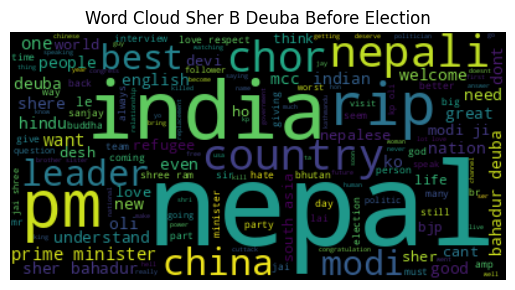

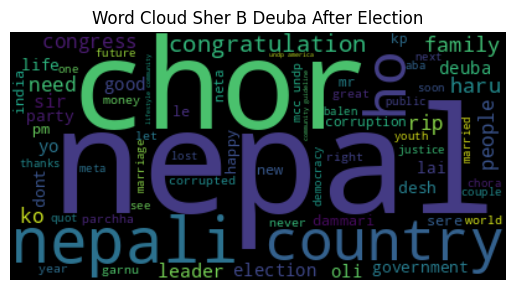

In [ ]:
# prompt: form word cloud for processed_text  before and after election

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all processed texts before the election
text_before = " ".join(before_election_df['processed_text'].astype(str))

# Combine all processed texts after the election
text_after = " ".join(after_election_df['processed_text'].astype(str))


# Create and generate a word cloud image:
wordcloud_before = WordCloud().generate(text_before)

# Display the generated image:
plt.imshow(wordcloud_before, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Sher B Deuba Before Election")
plt.show()


# Create and generate a word cloud image:
wordcloud_after = WordCloud().generate(text_after)

# Display the generated image:
plt.imshow(wordcloud_after, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Sher B Deuba After Election")
plt.show()

TOP WORDS

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# ... (Your existing code for loading data and preprocessing) ...

# Combine all processed texts before the election
text_before = " ".join(before_election_df['processed_text'].astype(str))

# Combine all processed texts after the election
text_after = " ".join(after_election_df['processed_text'].astype(str))

def get_top_n_words(text, n=10):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

top_words_before = get_top_n_words(text_before, 8)
top_words_after = get_top_n_words(text_after, 8)

print("Top 20 words before election:")
for word, count in top_words_before:
    print(f"{word}: {count}")

print("\nTop 20 words after election:")
for word, count in top_words_after:
    print(f"{word}: {count}")

Top 20 words before election:
nepal: 187
india: 88
pm: 46
country: 45
rip: 37
nepali: 37
people: 37
chor: 36

Top 20 words after election:
nepal: 42
chor: 38
nepali: 19
country: 17
ho: 17
congratulation: 16
haru: 13
family: 13


RIP Text Analysis

In [ ]:
# prompt: display processed_text where there is "rip" word and published_at . Display full text

import pandas as pd

# Assuming your dataframe 'df' is already created and preprocessed as in your original code

# Filter rows where 'processed_text' contains "rip"
filtered_df = df[df['processed_text'].str.contains("rip", na=False)]

# Display the 'processed_text' and 'published_at' columns for the filtered rows
for index, row in filtered_df.iterrows():
  print(f"Processed Text: {row['processed_text']}\nPublished At: {row['published_at']}\nFull Text: {row['text']}\n---")

Processed Text: rip
Published At: 2022-03-12 07:01:04
Full Text: Rip
---
Processed Text: rip shere
Published At: 2022-11-08 06:09:49
Full Text: RiP Shere
---
Processed Text: rip
Published At: 2022-04-06 06:24:31
Full Text: Rip
---
Processed Text: rip
Published At: 2022-02-27 19:41:39
Full Text: Rip
---
Processed Text: rip
Published At: 2022-03-18 06:41:56
Full Text: Rip
---
Processed Text: rip deuba mean day one happiest day nepalese history
Published At: 2022-06-17 17:03:27
Full Text: Rip deuba , I mean that day will be one of the happiest days in Nepalese history
---
Processed Text: mc totle rip
Published At: 2022-03-02 12:19:59
Full Text: Mc totle rip
---
Processed Text: rip bahadur dewa
Published At: 2022-02-26 05:26:47
Full Text: Rip she bahadur dewa
---
Processed Text: rip
Published At: 2022-02-28 05:16:47
Full Text: Rip 😭😭😭😭😭
---
Processed Text: rip
Published At: 2022-03-01 11:50:02
Full Text: Rip
---
Processed Text: rip
Published At: 2022-02-28 17:08:29
Full Text: Rip
---
Proce

distilbert-base-uncased-finetuned-sst-2-english model for sentiment analysis

In [ ]:
# https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english

from transformers import pipeline

# Load the sentiment analysis pipeline
classifier = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Function to apply sentiment analysis to a text
def analyze_sentiment(text):
    try:
        result = classifier(text)[0]
        return result['label'], result['score']
    except Exception as e:
        print(f"Error analyzing sentiment for text: {text}. Error: {e}")
        return "ERROR", 0.0  # Return a default value in case of an error

# Apply sentiment analysis to the 'processed_text' column
before_election_df[['sentiment_label', 'sentiment_score']] = before_election_df['processed_text'].apply(lambda x: pd.Series(analyze_sentiment(x)))
after_election_df[['sentiment_label', 'sentiment_score']] = after_election_df['processed_text'].apply(lambda x: pd.Series(analyze_sentiment(x)))

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


emotion-english-distilroberta-base model for emotion detection

In [ ]:
#  https://huggingface.co/j-hartmann/emotion-english-distilroberta-base

from transformers import pipeline

# Load the emotion detection model
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base")

# Function to detect emotions in a text
def detect_emotion(text):
    try:
        result = classifier(text)
        return result[0]['label']  # Return the predicted emotion label
    except Exception as e:
        print(f"Error processing text: {e}")
        return None

# Apply the emotion detection model to the 'processed_text' column
before_election_df['detected_emotion'] = before_election_df['processed_text'].apply(detect_emotion)
after_election_df['detected_emotion'] = after_election_df['processed_text'].apply(detect_emotion)

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


Sentiment Counts

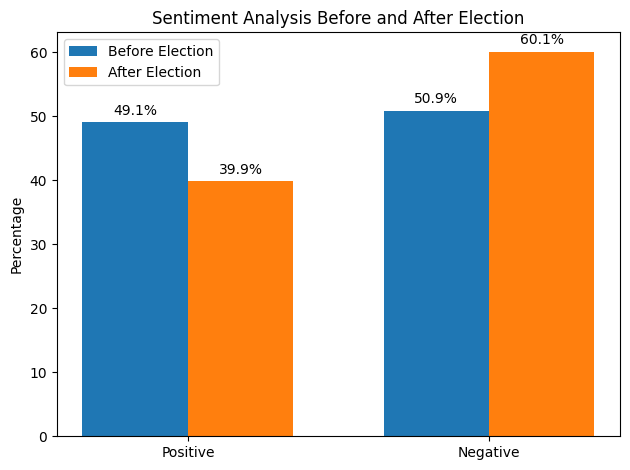

In [ ]:
# prompt: compare sentiment before and after election using different chart in percentage

import matplotlib.pyplot as plt

# Calculate sentiment percentages before and after the election
before_positive = before_election_df[before_election_df['sentiment_label'] == 'POSITIVE'].shape[0]
before_negative = before_election_df[before_election_df['sentiment_label'] == 'NEGATIVE'].shape[0]
before_total = before_election_df.shape[0]

after_positive = after_election_df[after_election_df['sentiment_label'] == 'POSITIVE'].shape[0]
after_negative = after_election_df[after_election_df['sentiment_label'] == 'NEGATIVE'].shape[0]
after_total = after_election_df.shape[0]


before_positive_percent = (before_positive / before_total) * 100 if before_total else 0
before_negative_percent = (before_negative / before_total) * 100 if before_total else 0
after_positive_percent = (after_positive / after_total) * 100 if after_total else 0
after_negative_percent = (after_negative / after_total) * 100 if after_total else 0


# Create the chart
labels = ['Positive', 'Negative']
before_percentages = [before_positive_percent, before_negative_percent]
after_percentages = [after_positive_percent, after_negative_percent]

x = range(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar([i - width/2 for i in x], before_percentages, width, label='Before Election')
rects2 = ax.bar([i + width/2 for i in x], after_percentages, width, label='After Election')

ax.set_ylabel('Percentage')
ax.set_title('Sentiment Analysis Before and After Election')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add percentage labels above the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

EMOTION COUNT

In [ ]:
# Group the DataFrame by 'detected_emotion' and count the occurrences of each emotion.
emotion_counts = before_election_df.groupby('detected_emotion').size()

# Display the emotion counts.
emotion_counts

,0
detected_emotion,
anger,43
disgust,12
fear,7
joy,101
neutral,325
sadness,56
surprise,24


In [ ]:
emotion_countss=after_election_df.groupby('detected_emotion').size()
emotion_countss

,0
detected_emotion,
anger,26
disgust,9
fear,7
joy,43
neutral,117
sadness,14
surprise,12


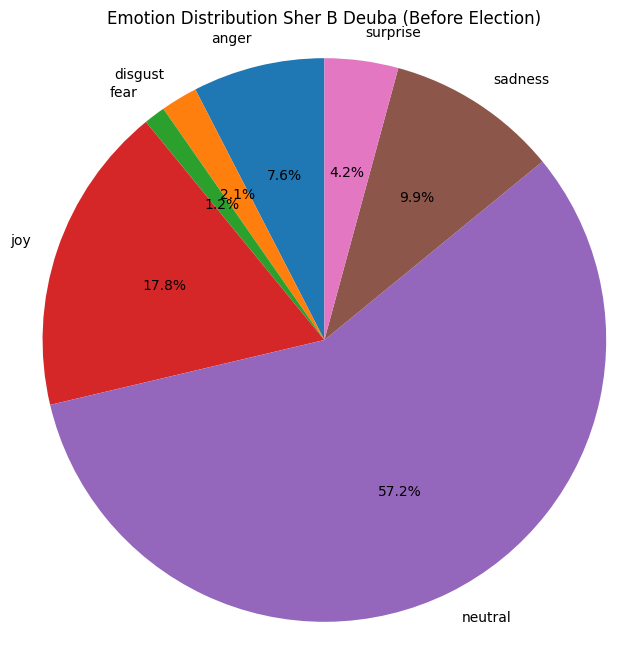

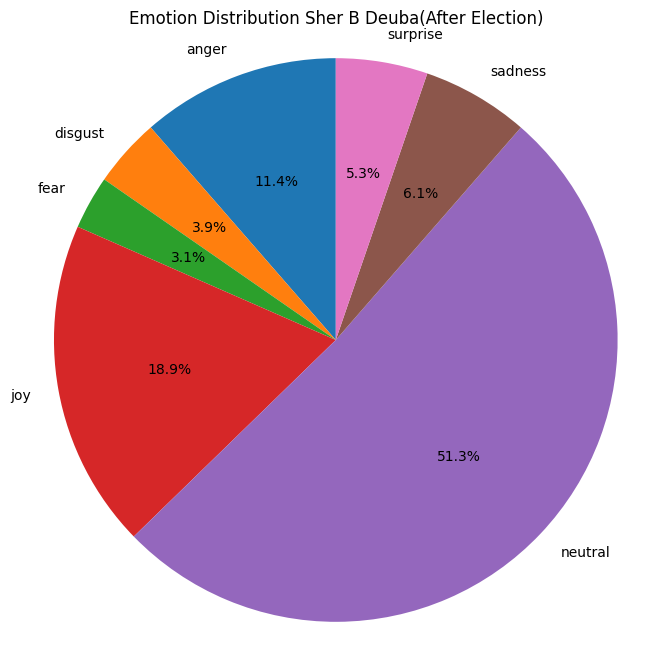

In [ ]:
import matplotlib.pyplot as plt

# Create the pie chart for before election
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution Sher B Deuba (Before Election)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Create the pie chart for after election
plt.figure(figsize=(8, 8))
plt.pie(emotion_countss, labels=emotion_countss.index, autopct='%1.1f%%', startangle=90)
plt.title('Emotion Distribution Sher B Deuba(After Election)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Further EDA

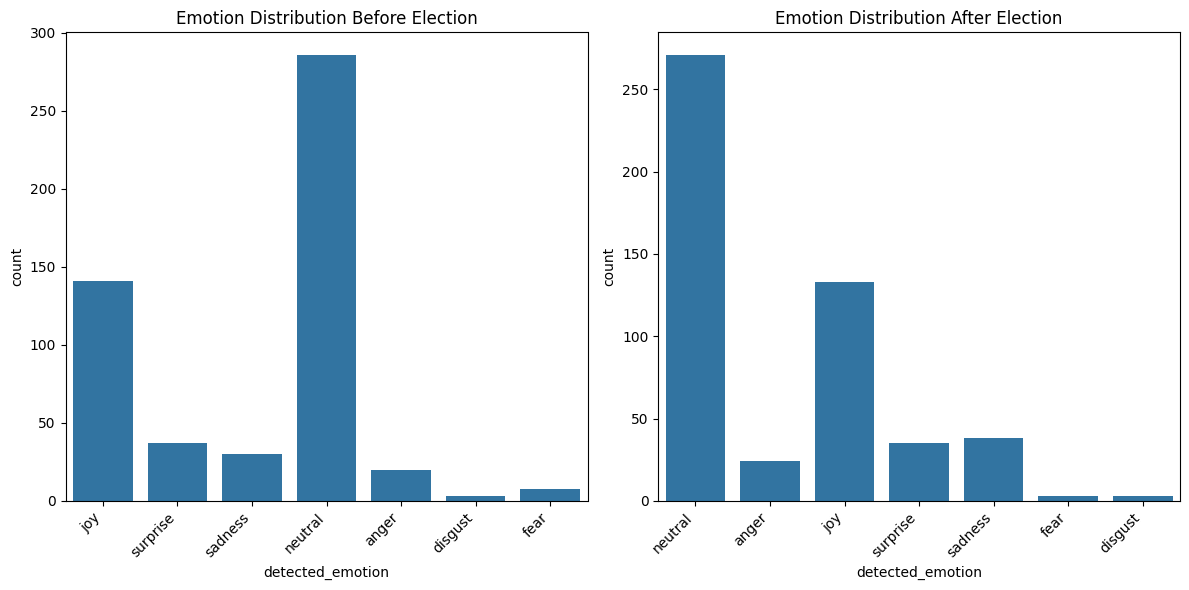

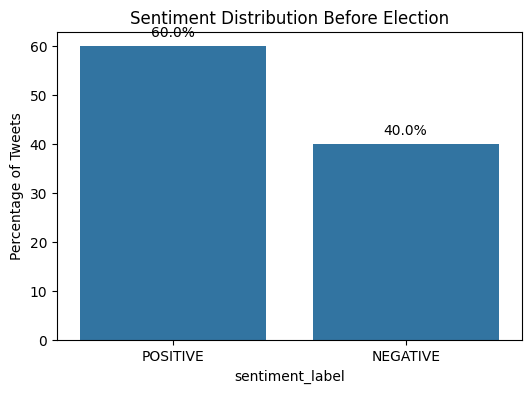

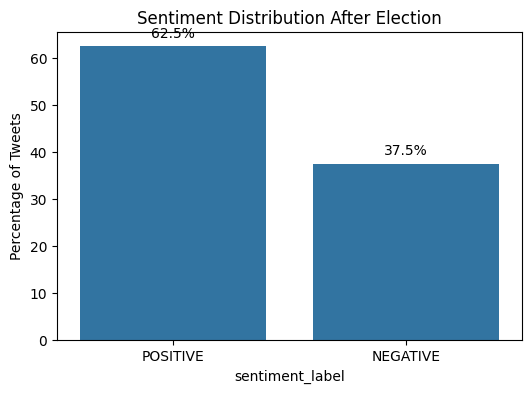

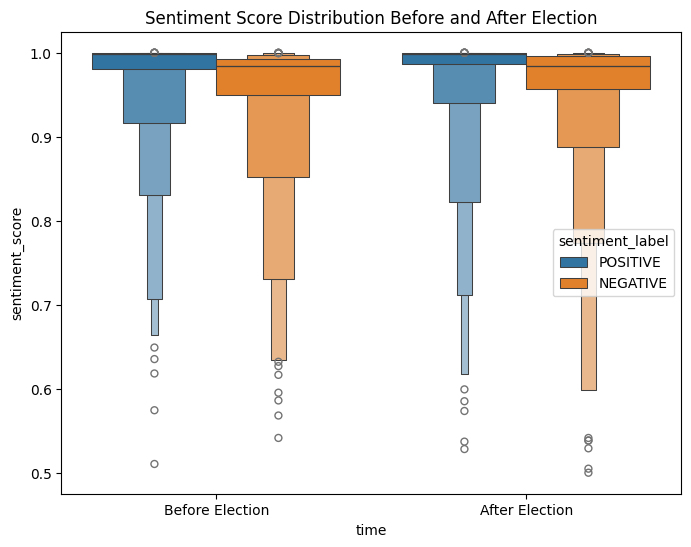

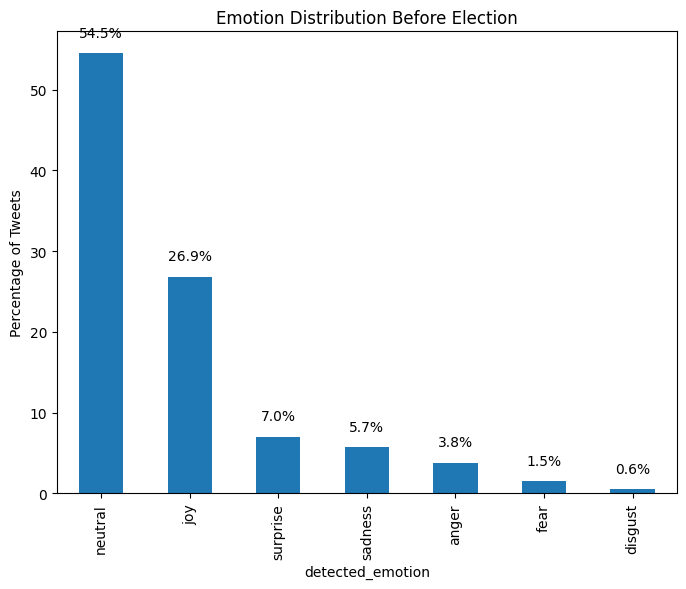

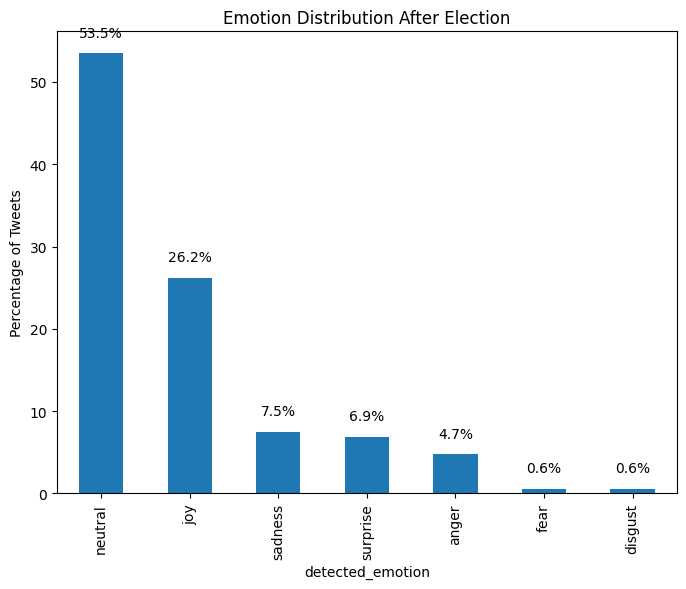

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Emotion Distribution - Countplot

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='detected_emotion', data=before_election_df)
plt.title('Emotion Distribution Before Election')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.countplot(x='detected_emotion', data=after_election_df)
plt.title('Emotion Distribution After Election')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Sentiment Distribution - Percentage Barplot
def plot_sentiment_percentages(df, title):
    sentiment_counts = df['sentiment_label'].value_counts(normalize=True) * 100
    plt.figure(figsize=(6, 4))
    sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
    plt.title(title)
    plt.ylabel('Percentage of Tweets')
    for i, v in enumerate(sentiment_counts.values):
        plt.text(i, v + 2, f'{v:.1f}%', ha='center')
    plt.show()

plot_sentiment_percentages(before_election_df, 'Sentiment Distribution Before Election')
plot_sentiment_percentages(after_election_df, 'Sentiment Distribution After Election')


# Combined Sentiment and Emotion - Boxenplot
# Create a combined dataframe
combined_df = pd.concat([before_election_df.assign(time='Before Election'),
                         after_election_df.assign(time='After Election')])

# Boxenplot for Sentiment Score across time periods
plt.figure(figsize=(8, 6))
sns.boxenplot(x='time', y='sentiment_score', hue='sentiment_label', data=combined_df)
plt.title('Sentiment Score Distribution Before and After Election')
plt.show()


# Emotion Distribution across time periods (using percentages for comparison)
def plot_emotion_percentages(df, title):
    emotion_percentages = df['detected_emotion'].value_counts(normalize=True) * 100
    plt.figure(figsize=(8,6))
    emotion_percentages.plot(kind='bar')
    plt.title(title)
    plt.ylabel('Percentage of Tweets')
    for i, v in enumerate(emotion_percentages.values):
        plt.text(i, v + 2, f'{v:.1f}%', ha='center')
    plt.show()

plot_emotion_percentages(before_election_df,'Emotion Distribution Before Election')
plot_emotion_percentages(after_election_df,'Emotion Distribution After Election')
